# Section 3.2: FC neural network for regression
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
def relu(x):
    return x * (x > 0) # faster than np.max

In [3]:
def relu_derivative(x):
    return (x > 0) * 1

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [5]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [6]:
def tanh(x):
    return np.tanh(x)

In [7]:
def tanh_derivatve(x):
    return 1-np.power(np.tanh(x),2)

In [8]:
def forward_prop(layers,W,X):
    
    # dictionary of layer outputs for each example (n_i,N) 
    Z = {}
    # dictionary of layer preactivations for each example (n_i,N) 
    A = {}
    
    if(layers>1):
    
        for i in range(layers-1):
            if (i==0):
        
                A["layer{0}".format(i+1)]=np.dot(W["layer{0}".format(i+1)],X)
                # specify here the activation function
                Z["layer{0}".format(i+1)]=sigmoid(A["layer{0}".format(i+1)])
                
                # insert 1 at the start of each output for the bias
                Z["layer{0}".format(i+1)]=np.insert(Z["layer{0}".format(i+1)],0,1,axis=0)
                #print("output layer",i+1,": ",Z["layer{0}".format(i+1)]) 
            else:
                
                A["layer{0}".format(i+1)]=np.dot(W["layer{0}".format(i+1)],Z["layer{0}".format(i)])
                # specify here the activation function
                Z["layer{0}".format(i+1)]=sigmoid(A["layer{0}".format(i+1)])
    
                # insert 1 at the start of each output for the bias
                Z["layer{0}".format(i+1)]=np.insert(Z["layer{0}".format(i+1)],0,1,axis=0)
                #print("output layer",i+1,": ",Z["layer{0}".format(i+1)]) 
            
        A["layer{0}".format(layers)]=np.dot(W["layer{0}".format(layers)],Z["layer{0}".format(layers-1)])
        Z["layer{0}".format(layers)]=A["layer{0}".format(layers)]
        #print("output last layer:",Z["layer{0}".format(layers)])  
        
    elif (layers==1):
        A["layer1"]=np.dot(W["layer1"],X)  
        Z["layer1"]=A["layer1"]
        #print("output:",Z["layer1"])        
    else:
        print("Vector of neurons badly specified.")
  
    return A,Z

In [9]:
def loss_function(Y,Y_hat):
    
    L=0
    
    n_examples=Y.shape[0]

    for n in range(n_examples):
        #print("Y",Y[n])
        #print("Y_hat",Y_hat[n])
        L+=(Y[n]-Y_hat[n])**2      
        
    error=0.5*L/n_examples
    #print("Error:", error)
    
    return error

In [10]:
def multilayer_perceptron_regression(neurons,X,Y,max_epochs=10000,lrate=0.0001):
    """
    Input: neurons is a vector (n1,n2,...,1) of hidden layers and output layer (ni is the number of neurons of layer i)
    """
    # adding the output layer
    layers=len(neurons)
    
    # number of examples
    N=X.shape[0]
    
    # data input dimension
    n0=X.shape[1]
    
    # dictionary of weights for each layer (Layer,(n_i,n_(i-1)))
    W = {}
    
    # add bias to feature vector
    X=np.insert(X,0,1,axis=1)
    X=X.T
    
    epoch=0
    
    loss=[]
    
    # Weight Initialization
    for i in range(layers):
        if (i==0):
            # normal initialization (+1 for the bias weight)
            W["layer{0}".format(i+1)] = np.random.normal(0, 1, (neurons[i],n0+1))
            #W["layer{0}".format(i+1)] = np.ones((neurons[i],n0+1))
        else:
            # normal initialization (+1 for the bias weight)
            W["layer{0}".format(i+1)] = np.random.normal(0, 1, (neurons[i],neurons[i-1]+1))
            #W["layer{0}".format(i+1)] = np.ones((neurons[i],neurons[i-1]+1))
        
    while(epoch<max_epochs):
        
        epoch+=1
        if (epoch%1000==0):
            print("Epoch:",epoch)
        
        for n in range(N):
            
            #print("n:",n+1)

            # forward propagation
            A,Z=forward_prop(layers,W,X)

            # backward propagation
            W=backward_prop(layers,W,A,Z,X,Y,N,n,lrate)  

        outputs=Z["layer{0}".format(len(neurons))][0]
        loss.append(loss_function(Y,outputs))
        
    return W,loss

In [11]:
def backward_prop(layers,W,A,Z,X,Y,N,n,lrate):
    
    # From eq. (1.6.44)
    delta={}
    
    # learning rate
    eta=lrate
    
    for l in range(layers, 0, -1):
        if (l==layers):
            delta["layer{0}".format(l)] = Z["layer{0}".format(l)][:,n][0]-Y[n]
            #print("delta",delta)
        else:
            a_i=A["layer{0}".format(l)][:,n]
            # choose activation function derivative
            h_prime=sigmoid_derivative(a_i).reshape((len(a_i),1))
            aux=np.dot(W["layer{0}".format(l+1)][:,1:].T,delta["layer{0}".format(l+1)])
            delta["layer{0}".format(l)] = np.multiply(h_prime,aux)
            #print("delta",delta)
    
    for l in range(1,layers+1):
        if(l==1):
            aux1=X[:,n]
            aux1=aux1.reshape((1,aux1.shape[0]))
            aux2=delta["layer{0}".format(l)]
            #print("aux1:",aux1) 
            #print("delta.dot.X:",np.outer(aux2,aux1))
            #print("W_k:",W["layer{0}".format(l)])
            W["layer{0}".format(l)]+=-eta*np.outer(aux2,aux1)
            #print("layer:",l,": W_(k+1):",W["layer{0}".format(l)])
            
        elif (l==layers):
            aux1=Z["layer{0}".format(l-1)][:,n].T
            aux1=aux1.reshape((1,aux1.shape[0]))
            aux2=delta["layer{0}".format(l)]
            #print("W_k:",W["layer{0}".format(l)])
            W["layer{0}".format(l)]+=-eta*aux2*aux1
            #print("layer:",l,": W_(k+1):",W["layer{0}".format(l)])
        else:
            aux1=Z["layer{0}".format(l-1)][:,n]          
            aux1=aux1.reshape((1,aux1.shape[0]))               
            aux2=delta["layer{0}".format(l)]  
            #print("W_k:",W["layer{0}".format(l)])
            W["layer{0}".format(l)]+=-eta*np.outer(aux2,aux1)
            #print("layer:",l,": W_(k+1):",W["layer{0}".format(l)])
    return W

## Linear function approximation

In [12]:
# number of datapoints
N=2

In [13]:
# generating data
X=np.array([[1],[10]])
Y=np.array([1,10])

#### 1 neuron

In [14]:
# defining and running the network
neurons=[1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=1000,lrate=0.01)

Epoch: 1000


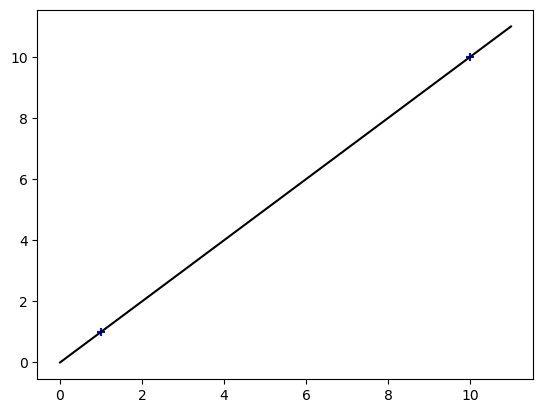

In [15]:
#plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(0, 11,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T
A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')

## Quadratic function approximation

In [16]:
# number of datapoints
N=10

In [17]:
# generating and formating data
X=np.linspace(-10, 10,N)
X=X.reshape((len(X),1))
Y=np.power(X,2)
Y=Y.reshape((len(Y)))

#### 1 hidden layer 100 neurons and 10 datapoints

In [18]:
# defining and running the network
neurons=[100,1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=5000,lrate=0.001)

Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000


Loss: 0.0013800614348026484


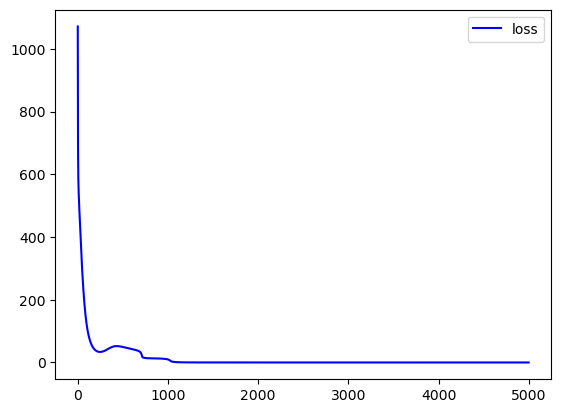

In [19]:
# plot loss function
plt.plot(range(5000), loss, 'b-', label='loss')

print("Loss:",loss[-1])

plt.legend()
plt.show()

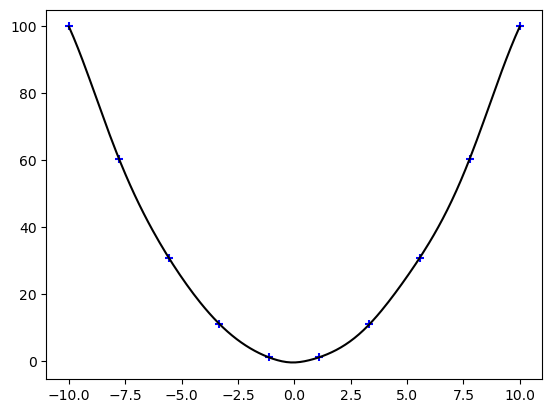

In [20]:
#plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(-10, 10,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T
A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')

#### 3 hidden layers with 10 neurons and 10 datapoints

In [21]:
# defining and running the network
neurons=[10,10,10,1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=10000,lrate=0.0001)

Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000
Epoch: 10000


Loss: 1.0745685724767953


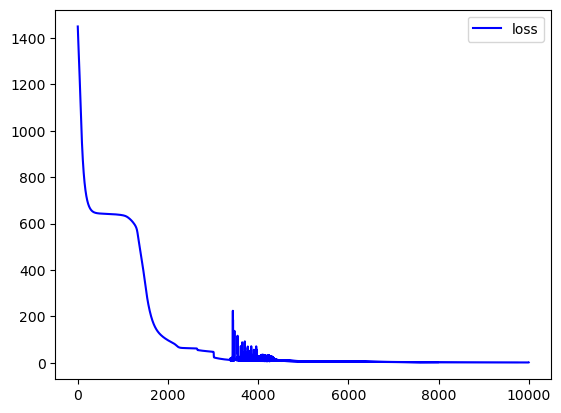

In [22]:
# plot loss function
plt.plot(range(10000), loss, 'b-', label='loss')

print("Loss:",loss[-1])

plt.legend()
plt.show()

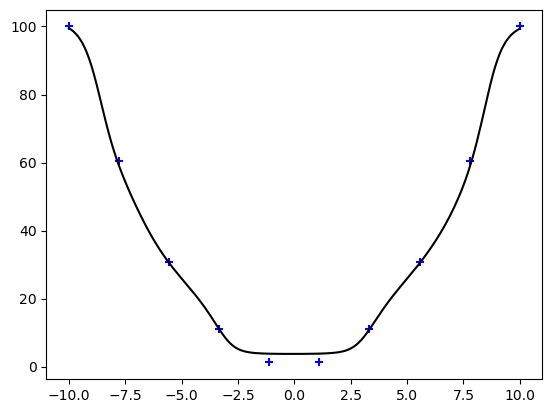

In [23]:
#plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(-10, 10,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T

A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')

## Sinusoidal approximation

In [24]:
# number of datapoints
N=20

In [25]:
# generating and formating data
X=np.linspace(-2*np.pi, 2*np.pi,N)
X=X.reshape((len(X),1))
Y=np.sin(X)
Y=Y.reshape((len(Y)))

#### 1 hidden layer 100 neurons and 20 datapoints

In [26]:
# defining and running the network
neurons=[100,1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=10000,lrate=0.001)

Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000
Epoch: 10000


Loss: 0.008613120323027005


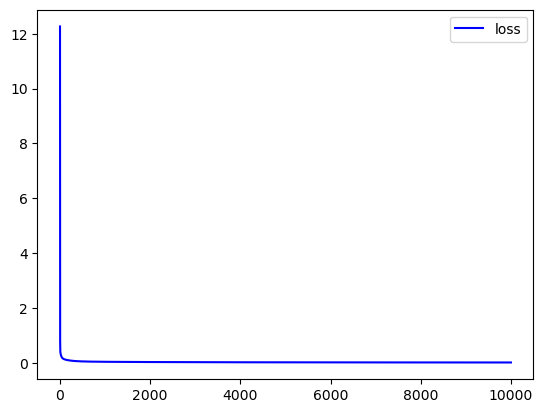

In [27]:
# plot loss function
plt.plot(range(10000), loss, 'b-', label='loss')

print("Loss:",loss[-1])

plt.legend()
plt.show()

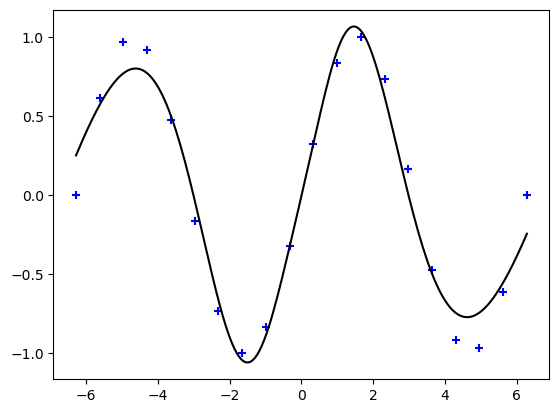

In [28]:
# plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(-2*np.pi, 2*np.pi,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T

A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')

## 2 hidden layers with 200 and 30 neurons respectively

In [29]:
# defining and running the network
neurons=[200,30,1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=1000,lrate=0.01)

Epoch: 1000


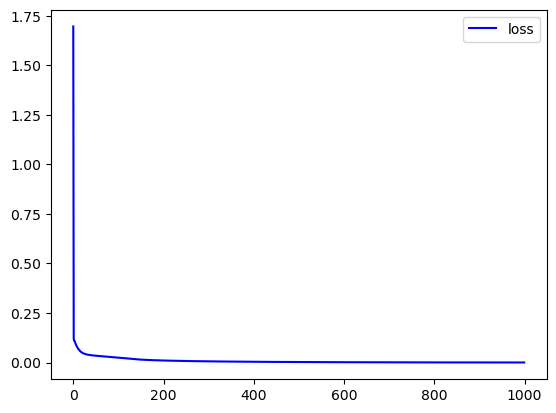

In [30]:
# plot loss function
plt.plot(range(1000), loss, 'b-', label='loss')
plt.legend()
plt.show()

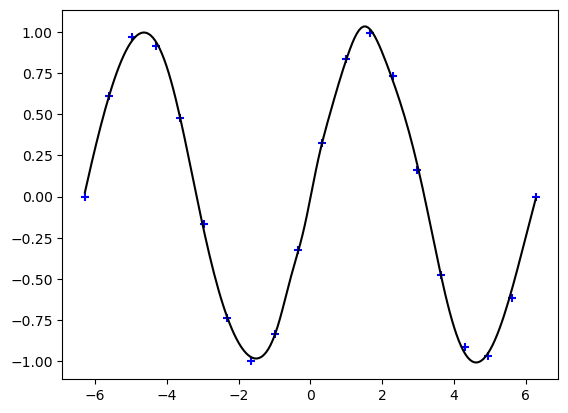

In [31]:
# plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(-2*np.pi, 2*np.pi,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T

A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')

#### 

### 2 hidden layers with 500 neurons each

In [51]:
# defining and running the network
neurons=[500,500,1]
W,loss=multilayer_perceptron_regression(neurons,X,Y,max_epochs=10000,lrate=0.01)

Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000
Epoch: 10000


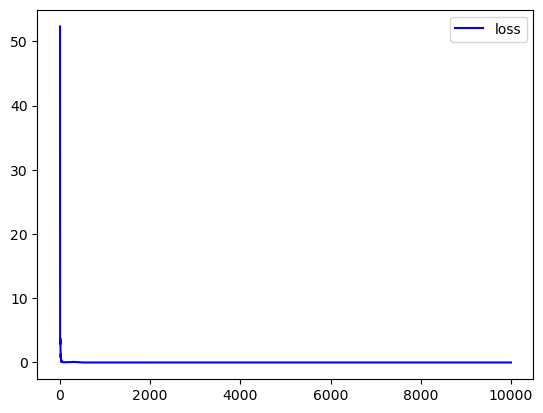

In [52]:
# plot loss function
plt.plot(range(10000), loss, 'b-', label='loss')
plt.legend()
plt.show()

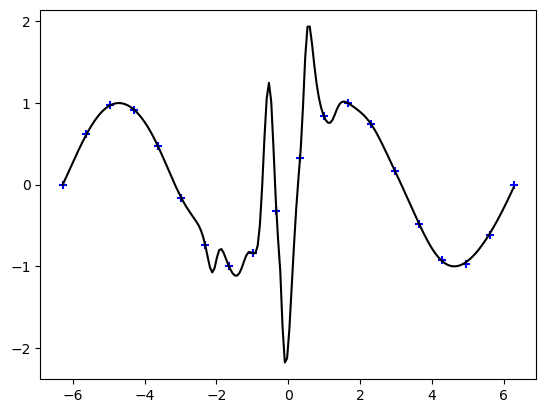

In [53]:
# plot datapoints
for j in range(X.shape[0]):
    plt.scatter(X[j][0],Y[j], c='blue',marker='+')
      
#plot neural network fit
xx = np.linspace(-2*np.pi, 2*np.pi,200)
xx1=xx.reshape((xx.shape[0],1))
xx1=np.insert(xx1,0,1,axis=1)
xx1=xx1.T
A,Z=forward_prop(len(neurons),W,xx1)
yy = Z["layer{0}".format(len(neurons))][0]

plt.plot(xx, yy, 'k-')